PROBLEM 1: Unemployment in area with high no of immigrants
theres already good transport so no need a lot of taxis

PROBLEM 2: Unemployment demand increases in summer, around August, but goes back to normal in September - teachers? seasonal UE?

PROBLEM 3: more women unemployed in August / summer but in summer men UE drops significantly (and rises again in winter)

**PROBLEM 4**: Looking at the problematic districts (with high UE)
1. **Sant marti**: there were more male unemployed in 2013, but in 2017 it turned into more female unemployed, (female unemployment is a potential problem - increased a lot in 2015 for some reason, male unemployment is going down steadily tho - so why is female unemployment going up so much) immigrants are also younger than avg, no of births dropping, no of deaths around the same, #2 in districts with most accidents, and with the highest mean of serious injuries (in car accidents) --> proves it's a dangerous place


somehow most public transport = most accidents (0.94 correlation) - we can use this to promote Uber instead of public transport???
- since the accidents happen where the bus stops are (for most districts the coordinates are very close - I compared the longitude and latitude of the place with most accidents and the place with most bus stops) --> PEOPLE SHOULD AVOID THE BUS STOP DANGER ZONES AND UBER INSTEAD (I think this location analysis is a nice point i even calculated the "distance" between them through root mean square and figured out how far that is in real life - fancy stuff)

and also found high UE rate = low life expectancy (-0.7 correlation) - proves UE is a big issue we must solve?


2. Eixample - interesting how theres consistently more female than male UE, with highest no of accidents, highest population, most bus stops, prob the busiest district


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UberHackathon/population.csv')
df.replace('5-9', '05-09', inplace=True)
df.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.groupby('Age')['Number'].sum())
# more younger than older ppl

Age
0-4      343517
05-09    342661
10-14    323956
15-19    320334
20-24    388085
25-29    528625
30-34    643898
35-39    695727
40-44    646874
45-49    587788
50-54    550379
55-59    498789
60-64    449216
65-69    436198
70-74    363660
75-79    319885
80-84    300115
85-89    197926
90-94     86740
>=95      23945
Name: Number, dtype: int64


In [ ]:
df2017 = df[df['Year'] == 2017]
compareyr= df2017.groupby('Age')['Number'].sum().to_frame()
compareyr.columns.values[0] = "y2017"
compareyr.head()

,y2017
Age,
0-4,68402
05-09,69309
10-14,67575
15-19,65953
20-24,79062


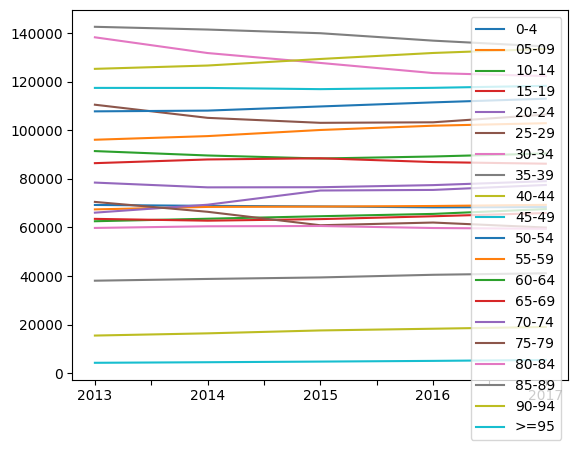

In [ ]:
df2017 = df[df['Year'] == 2017]
df2016 = df[df['Year'] == 2016]
df2015 = df[df['Year'] == 2015]
df2014 = df[df['Year'] == 2014]
df2013 = df[df['Year'] == 2013]

#avgAge': [2,7,12,17,22,27,32,37,42,47,52,57,62,67,72,77,82,87,92,97],
frame = {'2013': df2013.groupby('Age')['Number'].sum(),
         '2014': df2014.groupby('Age')['Number'].sum(),
         '2015': df2015.groupby('Age')['Number'].sum(),
         '2016': df2016.groupby('Age')['Number'].sum(),
         '2017': df2017.groupby('Age')['Number'].sum()
        }
year = pd.DataFrame(frame)

for ind in year.index:
    #print(df['Name'][ind], df['Stream'][ind])
    row = year.loc[ind]
    row.plot(legend=True)
  # I guess you can see the trend of each specific age group???

In [ ]:
yearcorr = year.corr()
yearcorr.head(1)
# NO CORRELATION :(((((

,2013,2014,2015,2016,2017
2013,1.0,0.998053,0.992371,0.989317,0.985525


<Axes: title={'center': 'Age distribution in Eixample'}, xlabel='Age'>

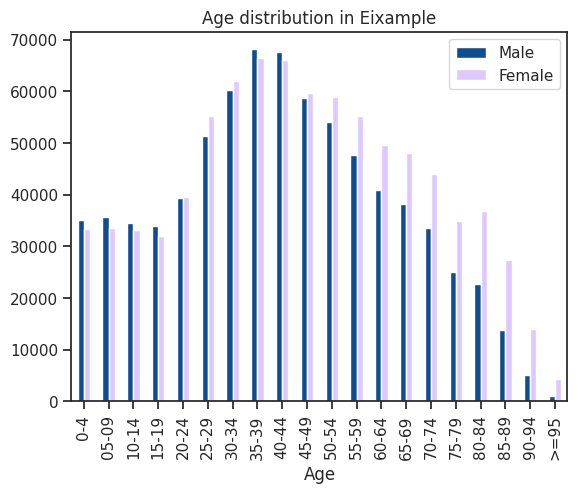

In [ ]:
dfmale = df2017[df2017['Gender'] == "Male"]
dffemale = df2017[df2017['Gender'] == "Female"]
frame2 = {'Male': dfmale.groupby('Age')['Number'].sum(),
         'Female': dffemale.groupby('Age')['Number'].sum()}
gender = pd.DataFrame(frame2)
gender.head(50)
gender.plot.bar(title="Age distribution in Eixample",color={"Male": "#0F4D92", "Female": "#dec8ff"})

# Press Ctrl M O to view output - see the shape of the graphs

# in general females live longer - more older women than older men
# but population in general is young - many more 20-40 year olds than older people

In [ ]:
#mode age
birthdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/births.csv')
im2 = pd.read_csv('/content/drive/MyDrive/UberHackathon/immigrants_emigrants_by_age.csv')
maa = pd.DataFrame(im2.groupby('Year')['Immigrants','Emigrants'].sum())
for i in [2015,2016,2017]:
  maa.loc[[i],'Number of births'] = birthdf.groupby('Year')['Number'].sum()
  maa.loc[[i],'Mode age'] = df[(df['Year']==i)&(df['District.Name']=='Sant Martí')].groupby('Age')['Number'].sum().idxmax()
  maa.loc[[i],'Mode immigrant age'] = im2[im2['Year']==i].groupby('Age')['Immigrants'].sum().idxmax()
maa.head()


<ipython-input-9-bd625e26c7b0>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  maa = pd.DataFrame(im2.groupby('Year')['Immigrants','Emigrants'].sum())


,Immigrants,Emigrants,Number of births,Mode age,Mode immigrant age
Year,,,,,
2015,88982,54109,13510.0,35-39,25-29
2016,85172,50274,13630.0,35-39,25-29
2017,97327,52652,13526.0,40-44,25-29


In [ ]:
maa = maa.drop(columns=['Emigrants'])
maa.head()

,Immigrants,Number of births,Mode age,Mode immigrant age
Year,,,,
2015,88982,13510.0,35-39,25-29
2016,85172,13630.0,35-39,25-29
2017,97327,13526.0,40-44,25-29


<Axes: title={'center': 'no of immigrants per district'}, xlabel='District Name'>

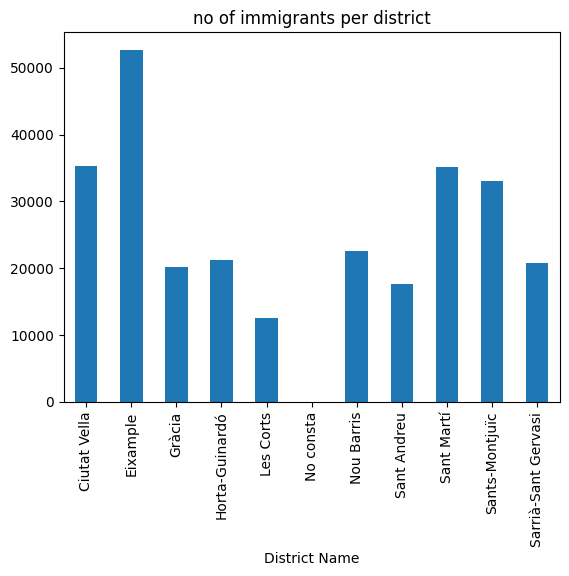

In [ ]:
im2trial = im2.groupby('District Name')['Immigrants'].sum()
im2trial.plot(kind='bar', title='no of immigrants per district')

In [ ]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_style('ticks')


,Male,Female,dif
District.Name,,,
Ciutat Vella,52920,48467,-4453
Eixample,123862,142554,18692
Gràcia,55554,65793,10239
Horta-Guinardó,79266,89485,10219
Les Corts,38213,43820,5607
Nou Barris,78231,88348,10117
Sant Andreu,70023,77571,7548
Sant Martí,113250,122263,9013
Sants-Montjuïc,86904,95006,8102


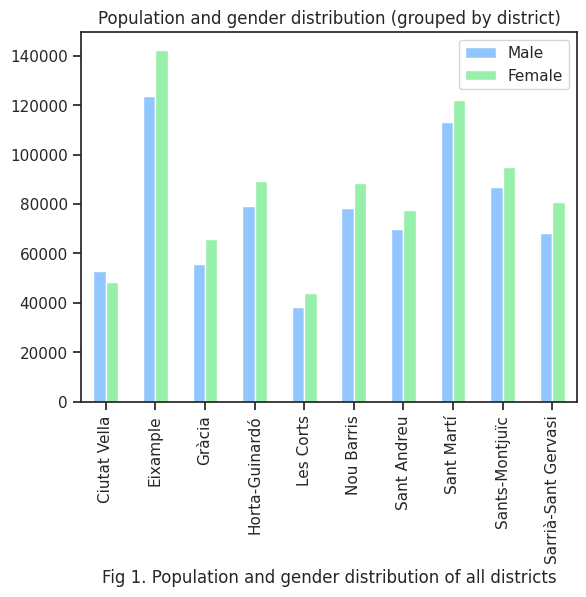

In [ ]:

frame3 = {'Male': dfmale.groupby('District.Name')['Number'].sum(),
         'Female': dffemale.groupby('District.Name')['Number'].sum()}
districtGender = pd.DataFrame(frame3)
districtGender.plot.bar(title="Population and gender distribution (grouped by district)", xlabel="Fig 1. Population and gender distribution of all districts")
districtGender['dif'] = districtGender['Female'] - districtGender['Male']
districtGender.head(50)
# every district has more females than males except Ciutat Vella

# accidents

In [ ]:
import pandas as pd
adf = pd.read_csv('/content/drive/MyDrive/UberHackathon/accidents_2017.csv')
adf.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [ ]:
print(len(adf[adf["Part of the day"]=="Morning"]))
print(len(adf[adf["Part of the day"]=="Afternoon"]))
print(len(adf[adf["Part of the day"]=="Night"]))

4067
5082
1190


just to emphasise our point - sant marti has the highest mean of serious injuries

avg number of serious injuries
District Name
Ciutat Vella           0.018333
Eixample               0.019809
Gràcia                 0.022599
Horta-Guinardó         0.013459
Les Corts              0.037190
Nou Barris             0.023985
Sant Andreu            0.018425
Sant Martí             0.038174
Sants-Montjuïc         0.019022
Sarrià-Sant Gervasi    0.021739
Unknown                0.037037
Name: Serious injuries, dtype: float64
 
which hour in the day has the most accidents
District Name
Ciutat Vella           18
Eixample               13
Gràcia                 14
Horta-Guinardó         13
Les Corts               8
Nou Barris             18
Sant Andreu            13
Sant Martí              9
Sants-Montjuïc          9
Sarrià-Sant Gervasi    15
Unknown                14
dtype: int64


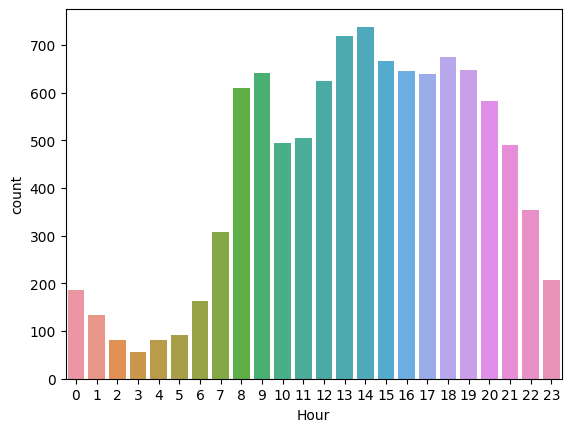

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
hours = adf.groupby(['Hour'])['Hour'].count()
# hvc = adf['Hour'].value_counts()
# hvc.plot(kind='bar', title='Frequency Count', xlabel='Hour', ylabel='Count')
# plt.show()

ax = sns.countplot(x="Hour",data=adf)
# adf=adf[adf['District Name']=='Sant Martí']
# sns.countplot(x="Vehicles involved",data=adf)
print("avg number of serious injuries")
print(adf.groupby('District Name')['Serious injuries'].mean())
print(" ")
print("which hour in the day has the most accidents")
print(adf.groupby('District Name').apply(lambda x: x['Hour'].value_counts().idxmax()))


# more accidents in the afternoon
# most accidents during lunchtime 1-2pm

# **WE SHOULD USE THIS LOCATION STUFF**

some districts are bang on - where there are bus stops - there are accidents - the smaller the dif - the closer the accidents are to the bus stops
 
*** the last column means that the accidents probably happen within that amount of metres irl ***
 


,accident zone long,bus stop long,difference in long,accident lat,bus stop lat,difference in lat,distance,real life distance / m
District Name,,,,,,,,
Ciutat Vella,2.177,2.177,0.000,41.382,41.385,-0.003,0.003000,330.0
Eixample,2.163,2.169,-0.006,41.394,41.390,0.004,0.007211,793.0
Gràcia,2.156,2.148,0.008,41.409,41.410,-0.001,0.008062,887.0
Horta-Guinardó,2.144,2.158,-0.014,41.424,41.422,0.002,0.014142,1556.0
Les Corts,2.133,2.112,0.021,41.391,41.385,0.006,0.021840,2402.0
Nou Barris,2.182,2.175,0.007,41.439,41.460,-0.021,0.022136,2435.0
Sant Andreu,2.191,2.191,0.000,41.447,41.439,0.008,0.008000,880.0
Sant Martí,2.187,2.201,-0.014,41.407,41.410,-0.003,0.014318,1575.0
Sants-Montjuïc,2.135,2.141,-0.006,41.375,41.375,0.000,0.006000,660.0


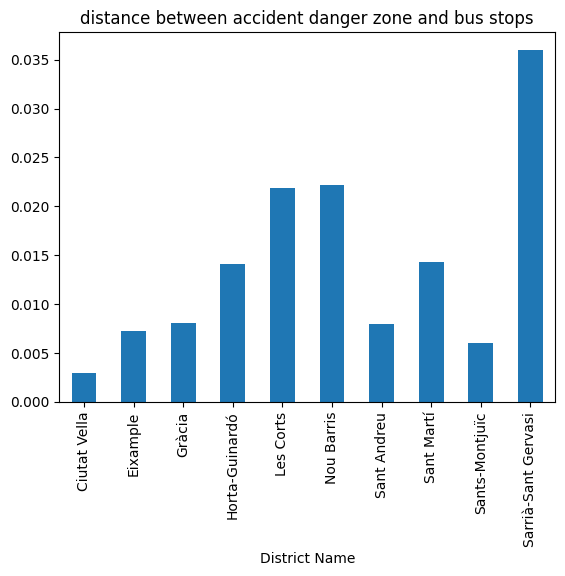

In [ ]:
# exploring location coordinates
bdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/bus_stops.csv')
adf.Longitude = adf.Longitude.round(3)
adf.Latitude = adf.Latitude.round(3)
bdf.Longitude = bdf.Longitude.round(3)
bdf.Latitude = bdf.Latitude.round(3)

print("some districts are bang on - where there are bus stops - there are accidents - the smaller the dif - the closer the accidents are to the bus stops")
loc = pd.DataFrame(adf.groupby('District Name').apply(lambda x: x['Longitude'].value_counts().idxmax()))
loc = loc.rename(columns = {0:'accident zone long'})
loc['bus stop long'] = bdf.groupby('District.Name').apply(lambda x: x['Longitude'].value_counts().idxmax())
loc['difference in long'] = loc['accident zone long']-loc['bus stop long']
loc['accident lat'] = adf.groupby('District Name').apply(lambda x: x['Latitude'].value_counts().idxmax())
loc['bus stop lat'] = bdf.groupby('District.Name').apply(lambda x: x['Latitude'].value_counts().idxmax())
loc['difference in lat'] = loc['accident lat']-loc['bus stop lat']

import numpy as np
loc['distance'] = loc['difference in long']**2 + loc['difference in lat']**2
loc['distance'] = np.sqrt(loc['distance'])
loc.drop(loc.tail(1).index,inplace=True)
loc['distance'].plot(kind='bar', title='distance between accident danger zone and bus stops')
loc['real life distance / m'] = (loc['distance']*110000).round(0)
print(" ")
print("*** the last column means that the accidents probably happen within that amount of metres irl ***")
print(" ")
loc.head(50)

<Axes: title={'center': 'no of accidents per district'}, xlabel='District Name'>

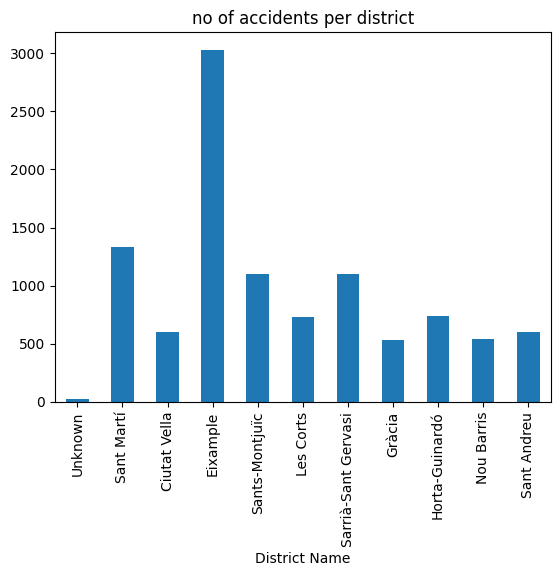

In [ ]:
adf['District Name'].value_counts()[adf['District Name'].unique()].plot(kind='bar', title='no of accidents per district', xlabel='District Name')
# Eixample has a lot of accidents??? this chart kinda looks like the population one

<Axes: title={'center': 'Serious Injuries per district'}, xlabel='District Name'>

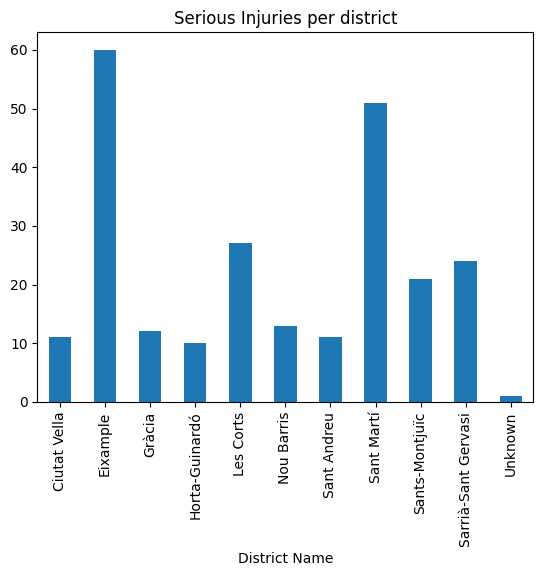

In [ ]:
si = adf.groupby('District Name')['Serious injuries'].sum()
si.plot(kind='bar', title='Serious Injuries per district')
# Eixample also has the most serious injuries

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185,41.416
5,2017S007775,Sant Martí,el Camp de l'Arpa del Clot,Indústria / Trinxant ...,Wednesday,September,20,12,Morning,1,0,1,2,2.183,41.416
6,2017S004484,Sant Martí,el Camp de l'Arpa del Clot,Trinxant / Indústria ...,Saturday,May,20,21,Afternoon,1,0,1,2,2.183,41.416
7,2017S010680,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Tuesday,December,26,20,Afternoon,2,0,2,1,2.184,41.416
8,2017S005152,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Monday,June,12,15,Afternoon,1,0,1,1,2.184,41.417


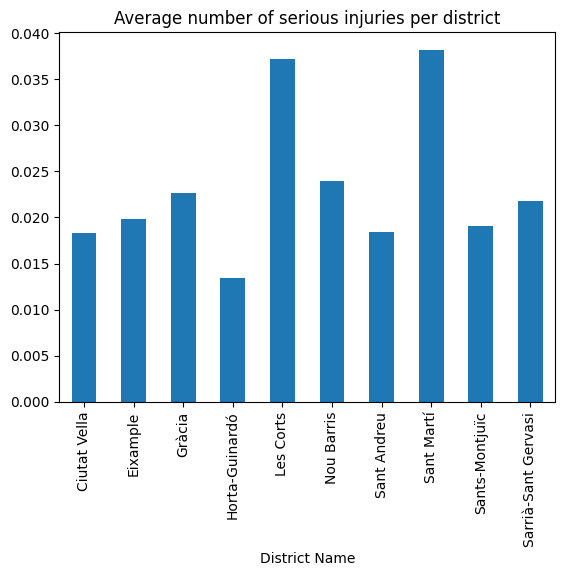

In [ ]:
simtemp = adf.copy()
simtemp = simtemp[simtemp['District Name']!='Unknown']
sim = simtemp.groupby('District Name')['Serious injuries'].mean()
sim.plot(kind='bar', title='Average number of serious injuries per district')
simtemp.head()

# TIME FOR **UNEMPLOYMENT**



In [ ]:
import pandas as pd
udf = pd.read_csv('/content/drive/MyDrive/UberHackathon/unemployment.csv')
udf.head()

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
0,2017,January,1,Ciutat Vella,1,el Raval,Male,Registered unemployed,2107
1,2017,January,1,Ciutat Vella,2,el Barri Gòtic,Male,Registered unemployed,538
2,2017,January,1,Ciutat Vella,3,la Barceloneta,Male,Registered unemployed,537
3,2017,January,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,Registered unemployed,741
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630


In [ ]:
do = udf.groupby(['Demand_occupation'])['Demand_occupation'].count()
print(do)

Demand_occupation
Registered unemployed    8880
Unemployment demand      5328
Name: Demand_occupation, dtype: int64


udf2017
udf2016
udf2015


<Axes: title={'center': 'overall'}>

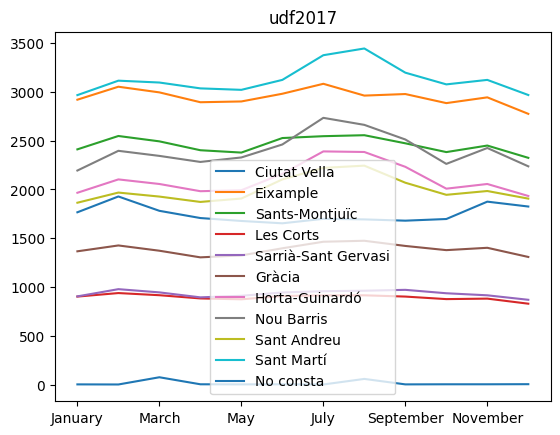

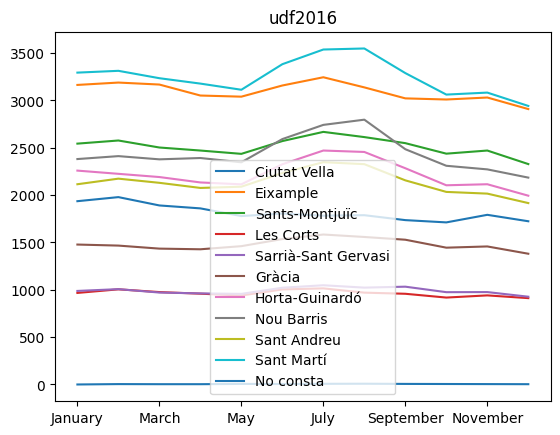

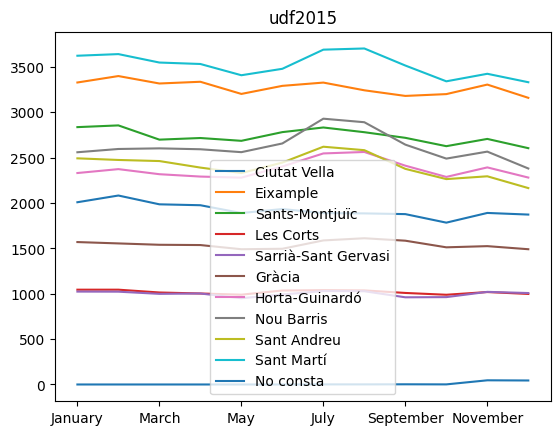

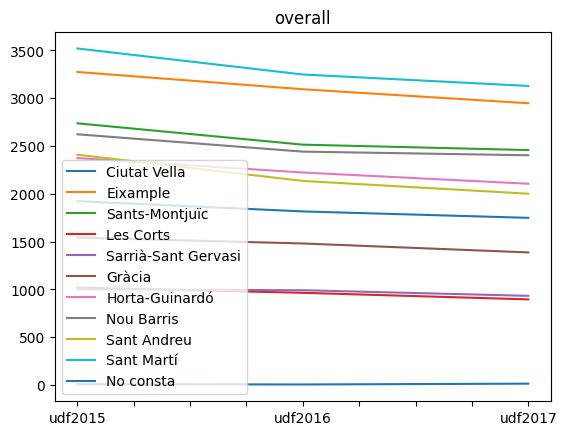

In [ ]:
import matplotlib.pyplot as plt
udf=udf[udf['Demand_occupation']=='Unemployment demand']
overall = pd.DataFrame(udf[udf['Year']==2017]['District Name'].value_counts()[udf['District Name'].unique()])

for yr in udf['Year'].unique():
  name = f'udf{yr}'
  globals()[name] = pd.DataFrame(udf[udf['Year']==yr]['District Name'].value_counts()[udf['District Name'].unique()])
  print(name)
  x = udf[udf['Year']==yr]['Month'].unique()
  for i in x:
    globals()[name][i] = udf[udf['Year']==yr][udf[udf['Year']==yr]['Month']==i].groupby('District Name')['Number'].sum()
  globals()[name].drop(columns=globals()[name].columns[0], axis=1, inplace=True)
  globals()[name].T.plot(title=name)
  globals()[name]['average'] = globals()[name].mean(axis=1)
  overall[name] = globals()[name]['average']

overall.drop(columns=overall.columns[0], axis=1, inplace=True)
overall = overall[overall.columns[::-1]]
overall.T.plot(title='overall')

In [ ]:
udf2017dec = udf[(udf['Year']==2017) & (udf['Month']=='December')]
udf2017dec.groupby('District Name')['Number'].sum()
# sant marti actually has more unemployed ppl than Eixample

District Name
Ciutat Vella           1825
Eixample               2775
Gràcia                 1308
Horta-Guinardó         1933
Les Corts               829
No consta                 4
Nou Barris             2237
Sant Andreu            1906
Sant Martí             2968
Sants-Montjuïc         2324
Sarrià-Sant Gervasi     869
Name: Number, dtype: int64

In [ ]:
mergedf = pd.DataFrame(columns=['Unemployed','Accidents'])
mergedf['Unemployed'] = udf2017dec.groupby('District Name')['Number'].sum()
mergedf['Accidents'] = adf['District Name'].value_counts()

In [ ]:
mergedf2 = mergedf.assign(Registered = udf[udf['Demand_occupation']=='Registered unemployed'].groupby('District Name')['Number'].sum(),
              Demand = udf[udf['Demand_occupation']=='Unemployment demand'].groupby('District Name')['Number'].sum())
# there's practically no difference between registered and demand???

# BIG TABLE TIME (for sant marti)

<ipython-input-26-3726d8e2b9ab>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = pd.DataFrame(im2.groupby('Year')['Immigrants','Emigrants'].sum())


,2013,2014,2015,2016,2017
Male Unemployed,106441.0,96886.0,106738.0,91998.0,83411.0
Female Unemployed,105531.0,100523.0,113718.0,104605.0,98120.0
Unemployed,211972.0,197409.0,220456.0,196603.0,181531.0
Total population,232826,232629,233659,233928,235513
Male,112317.0,112044.0,112497.0,112549.0,113250.0
Female,120509.0,120585.0,121162.0,121379.0,122263.0
Mode age,35-39,35-39,35-39,35-39,40-44
Most frequent nationality (immigrants),NaN,NaN,Spain,Spain,Spain
Immigrants,NaN,NaN,11381,11013,12720
Emigrants,NaN,NaN,7806,7302,7362


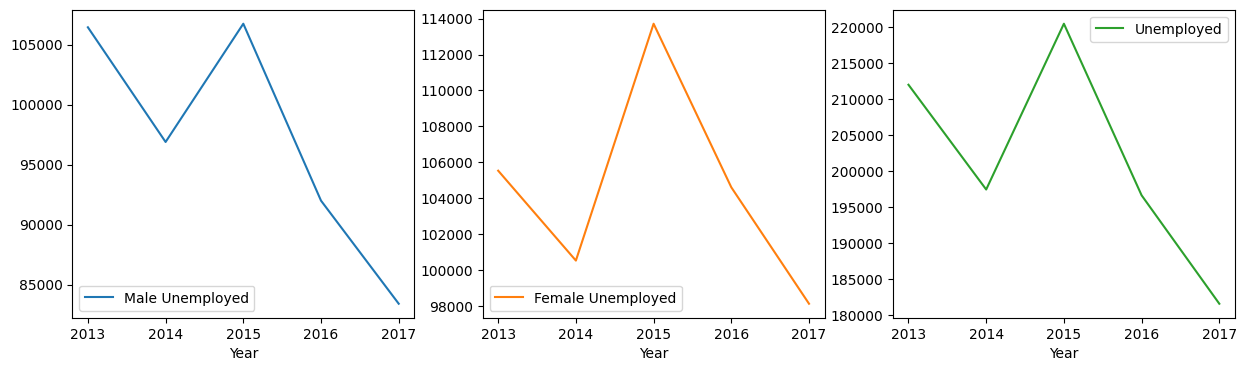

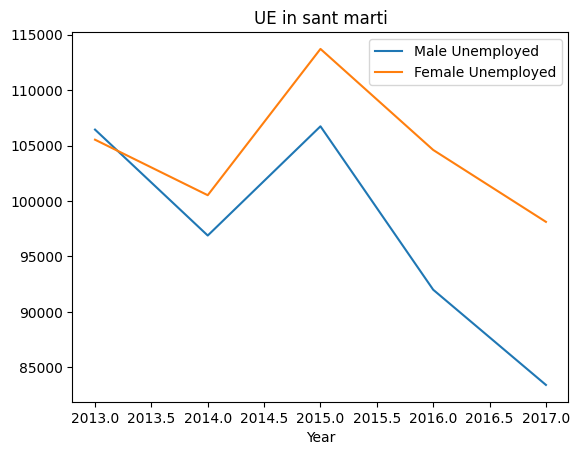

In [ ]:
import pandas as pd

#births
birthdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/births.csv')
sm = birthdf[birthdf['District Name']=='Sant Martí']
sm = pd.DataFrame(sm.groupby('Year')['Number'].sum())
sm = sm.rename(columns = {'Number':'births'})
sm = sm.T

#deaths
deathsdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/deaths.csv')
dsm = deathsdf[deathsdf['District.Name']=='Sant Martí']
dsm = pd.DataFrame(dsm.groupby('Year')['Number'].sum())
dsm = dsm.rename(columns = {'Number':'deaths'})
dsm = dsm.T

sm = pd.concat([dsm,sm])
cols = [2013,2014,2015,2016,2017]
sm = sm[cols]

#immigrant / emigrant / immigrant age
im2 = pd.read_csv('/content/drive/MyDrive/UberHackathon/immigrants_emigrants_by_age.csv')
im2 = im2[im2['District Name']=='Sant Martí']
temp = pd.DataFrame(im2.groupby('Year')['Immigrants','Emigrants'].sum())
for i in temp.index:
  temp.loc[[i],'Mode immigrant age'] = im2[im2['Year']==i].groupby('Age')['Immigrants'].sum().idxmax()
temp = temp.T

sm = pd.concat([temp,sm])
cols = [2013,2014,2015,2016,2017]
sm = sm[cols]

#most popular 'from' country

im1 = pd.read_csv('/content/drive/MyDrive/UberHackathon/immigrants_by_nationality.csv')
im1 = im1[im1['District Name']=='Sant Martí']
temp = pd.DataFrame(im1['Year'].value_counts()[im1['Year'].unique()])
for i in temp.index:
  temp.loc[[i],'Year'] = im1[im1['Year']==i].groupby('Nationality')['Number'].sum().idxmax()
temp = temp.rename(columns = {'Year':'Most frequent nationality (immigrants)'})
temp = temp.T

sm = pd.concat([temp,sm])
cols = [2013,2014,2015,2016,2017]
sm = sm[cols]
sm.head(10)

# male female etc
popdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/population.csv')
popdf = popdf[popdf['District.Name']=='Sant Martí']
popdf.head()

temp = pd.DataFrame(popdf.groupby('Year')['Number'].sum())
for i in temp.index:
  temp.loc[[i],'Male'] = popdf[(popdf['Year']==i)&(popdf['Gender'] == 'Male')]['Number'].sum()
  temp.loc[[i],'Female'] = popdf[(popdf['Year']==i)&(popdf['Gender'] == 'Female')]['Number'].sum()
  temp.loc[[i],'Mode age'] = popdf[popdf['Year']==i].groupby('Age')['Number'].sum().idxmax()
temp = temp.rename(columns = {'Number':'Total population'})
temp = temp.T

sm = pd.concat([temp,sm])
cols = [2013,2014,2015,2016,2017]
sm = sm[cols]
sm.head(10)

#unemployment stats
uedf = pd.read_csv('/content/drive/MyDrive/UberHackathon/unemployment.csv')
uedf = uedf[uedf['District Name']=='Sant Martí']
uedf.head()
temp = pd.DataFrame(uedf.groupby('Year')['Number'].sum())
temp = temp.rename(columns = {'Number':'Unemployed'})
for i in temp.index:
  temp.loc[[i],'Male Unemployed'] = uedf[(uedf['Year']==i)&(uedf['Gender'] == 'Male')]['Number'].sum()
  temp.loc[[i],'Female Unemployed'] = uedf[(uedf['Year']==i)&(uedf['Gender'] == 'Female')]['Number'].sum()
  # temp.loc[[i],'Registered Unemployed'] = uedf[(uedf['Year']==i)&(uedf['Demand_occupation']=='Registered unemployed')]['Number'].sum()
  # temp.loc[[i],'Unemployment demand'] = uedf[(uedf['Year']==i)&(uedf['Demand_occupation']=='Unemployment demand')]['Number'].sum()
temp = temp[['Male Unemployed','Female Unemployed','Unemployed']]
temp.plot.line(subplots=True,layout=(1, 3), figsize=(15, 4))
temp[['Male Unemployed','Female Unemployed']].plot.line(subplots=False, title='UE in sant marti')
temp = temp.T

sm = pd.concat([temp,sm])
cols = [2013,2014,2015,2016,2017]
sm = sm[cols]
sm.head(50)

#exploring other problematic districts

dfeix


<ipython-input-27-18d7b49aa7d7>:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = pd.DataFrame(temp2.groupby('Year')['Immigrants','Emigrants'].sum())


dfsmj


<ipython-input-27-18d7b49aa7d7>:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = pd.DataFrame(temp2.groupby('Year')['Immigrants','Emigrants'].sum())


dfnb


<ipython-input-27-18d7b49aa7d7>:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = pd.DataFrame(temp2.groupby('Year')['Immigrants','Emigrants'].sum())


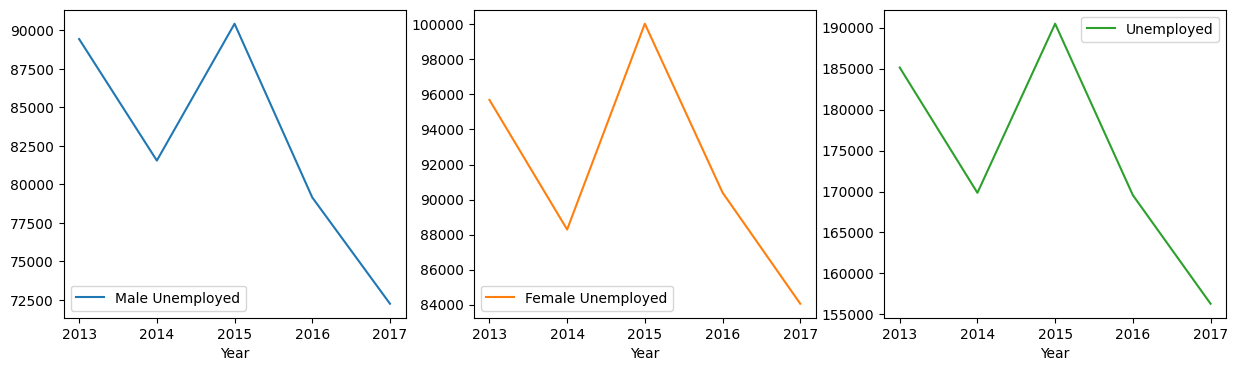

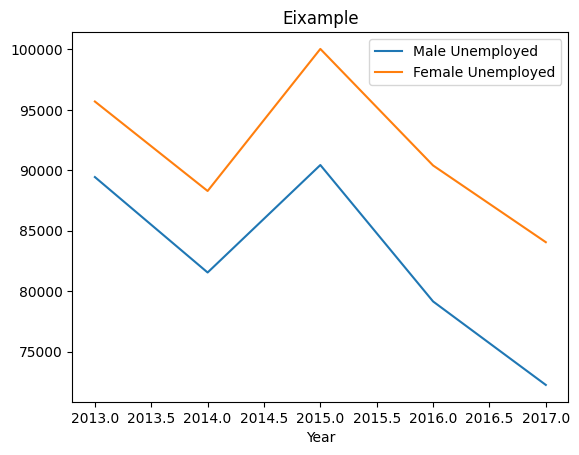

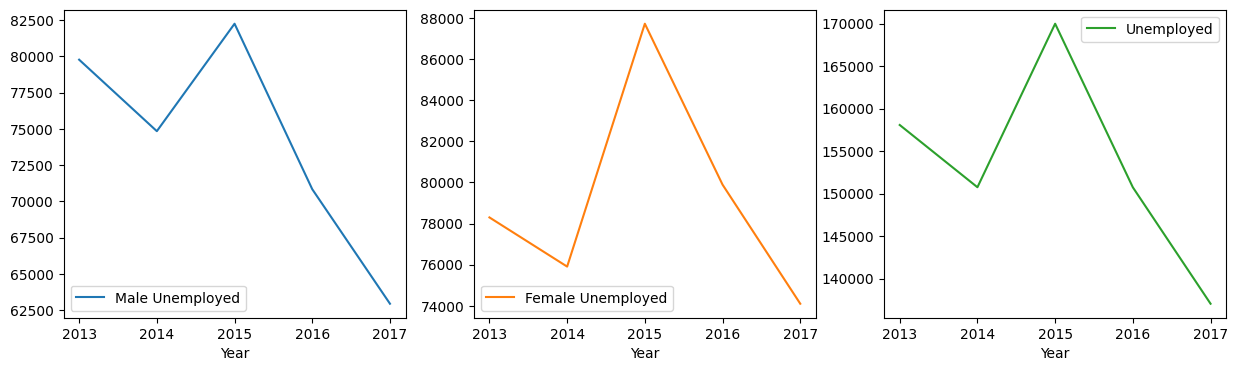

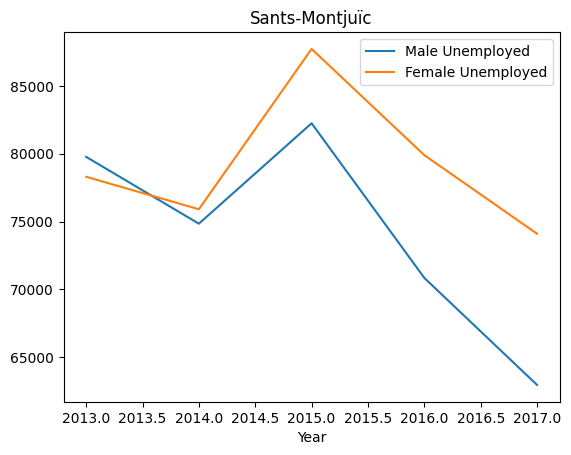

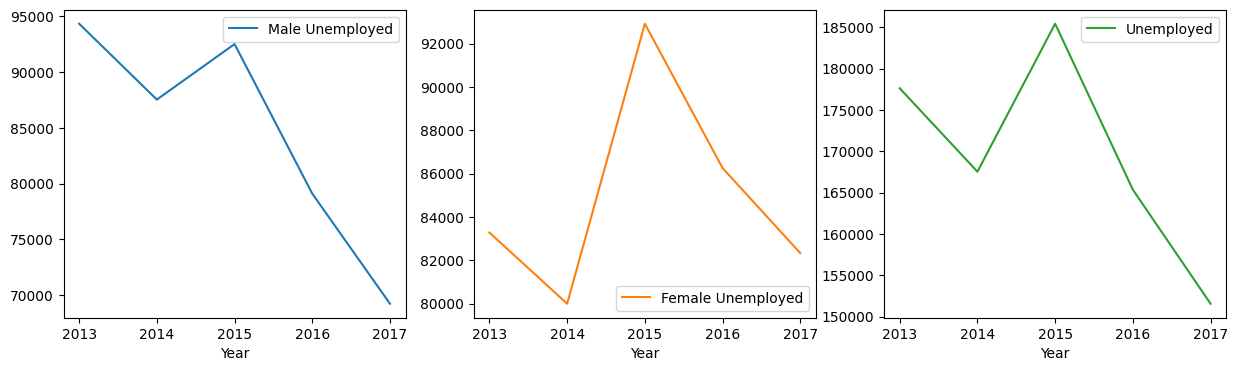

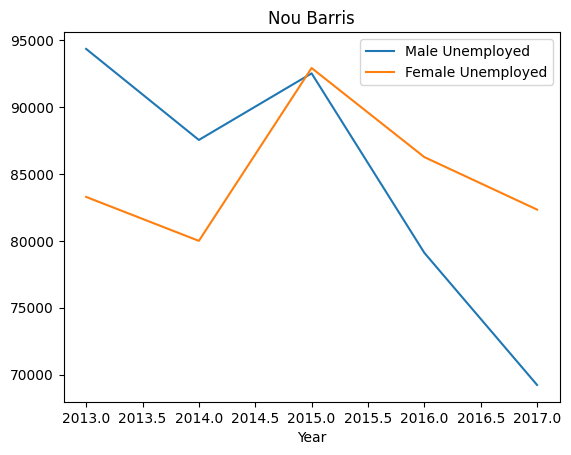

In [ ]:
import pandas as pd
dfdict = {"Eixample":"eix",
          "Sants-Montjuïc":"smj",
          "Nou Barris":"nb"
          }

cols = [2013,2014,2015,2016,2017]

for i in list(dfdict.keys()):
  name = f'df{dfdict.get(i)}'
  print(name)

  #births
  temp = birthdf[birthdf['District Name']==i]
  globals()[name] = pd.DataFrame(temp.groupby('Year')['Number'].sum())
  globals()[name] = globals()[name].rename(columns = {'Number':'births'})
  globals()[name] = globals()[name].T

  #deaths
  temp = deathsdf[deathsdf['District.Name']==i]
  temp = pd.DataFrame(temp.groupby('Year')['Number'].sum())
  temp = temp.rename(columns = {'Number':'deaths'})
  temp = temp.T

  globals()[name] = pd.concat([temp,globals()[name]])
  globals()[name] = globals()[name][cols]

  #immigrant / emigrant / immigrant age
  temp2 = pd.read_csv('/content/drive/MyDrive/UberHackathon/immigrants_emigrants_by_age.csv')
  temp2 = temp2[temp2['District Name']==i]
  temp = pd.DataFrame(temp2.groupby('Year')['Immigrants','Emigrants'].sum())
  for j in temp.index:
    temp.loc[[j],'Mode immigrant age'] = temp2[temp2['Year']==j].groupby('Age')['Immigrants'].sum().idxmax()
  temp = temp.T

  globals()[name] = pd.concat([temp,globals()[name]])
  globals()[name] = globals()[name][cols]

  #most popular 'from' country

  temp2 = pd.read_csv('/content/drive/MyDrive/UberHackathon/immigrants_by_nationality.csv')
  temp2 = temp2[temp2['District Name']==i]
  temp = pd.DataFrame(temp2['Year'].value_counts()[temp2['Year'].unique()])
  for k in temp.index:
    temp.loc[[k],'Year'] = temp2[temp2['Year']==k].groupby('Nationality')['Number'].sum().idxmax()
  temp = temp.rename(columns = {'Year':'Most frequent nationality (immigrants)'})
  temp = temp.T

  globals()[name] = pd.concat([temp,globals()[name]])
  globals()[name] = globals()[name][cols]

  # male female etc
  temp2 = pd.read_csv('/content/drive/MyDrive/UberHackathon/population.csv')
  temp2 = temp2[temp2['District.Name']==i]

  temp = pd.DataFrame(temp2.groupby('Year')['Number'].sum())
  for l in temp.index:
    temp.loc[[l],'Male'] = temp2[(temp2['Year']==l)&(temp2['Gender'] == 'Male')]['Number'].sum()
    temp.loc[[l],'Female'] = temp2[(temp2['Year']==l)&(temp2['Gender'] == 'Female')]['Number'].sum()
    temp.loc[[l],'Mode age'] = temp2[temp2['Year']==l].groupby('Age')['Number'].sum().idxmax()
  temp = temp.rename(columns = {'Number':'Total population'})
  temp = temp.T

  globals()[name] = pd.concat([temp,globals()[name]])
  globals()[name] = globals()[name][cols]

  #unemployment stats
  temp2 = pd.read_csv('/content/drive/MyDrive/UberHackathon/unemployment.csv')
  temp2 = temp2[temp2['District Name']==i]

  temp = pd.DataFrame(temp2.groupby('Year')['Number'].sum())
  temp = temp.rename(columns = {'Number':'Unemployed'})
  for m in temp.index:
    temp.loc[[m],'Male Unemployed'] = temp2[(temp2['Year']==m)&(temp2['Gender'] == 'Male')]['Number'].sum()
    temp.loc[[m],'Female Unemployed'] = temp2[(temp2['Year']==m)&(temp2['Gender'] == 'Female')]['Number'].sum()
    # temp.loc[[m],'Registered Unemployed'] = temp2[(temp2['Year']==m)&(temp2['Demand_occupation']=='Registered unemployed')]['Number'].sum()
    # temp.loc[[m],'Unemployment demand'] = temp2[(temp2['Year']==m)&(temp2['Demand_occupation']=='Unemployment demand')]['Number'].sum()
  temp = temp[['Male Unemployed','Female Unemployed','Unemployed']]
  temp.plot.line(subplots=True,layout=(1, 3), figsize=(15, 4))
  temp[['Male Unemployed','Female Unemployed']].plot.line(subplots=False, title=i)
  temp = temp.T

  globals()[name] = pd.concat([temp,globals()[name]])
  globals()[name] = globals()[name][cols]
  globals()[name].head(10)

In [ ]:
# Eixample stats table
dfeix.iloc[[0,1,6,10,8,12,11]].head(50)

,2013,2014,2015,2016,2017
Male Unemployed,89440.0,81548.0,90436.0,79155.0,72252.0
Female Unemployed,95688.0,88289.0,100036.0,90399.0,84055.0
Mode age,30-34,30-34,35-39,35-39,35-39
Mode immigrant age,NaN,NaN,25-29,25-29,25-29
Immigrants,NaN,NaN,17018,16635,19047
births,1965.0,2114.0,2143,2068,2067
deaths,NaN,NaN,2730,2660,2738


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *[2013], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *[2014], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *[2015], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *[2016], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *[2013, 2014], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_5, *[2014, 2015], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *[2015, 2016], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_7, *[2016, 2017], **{})
chart

In [ ]:
# Sants Montjuic stats table
dfsmj.head(50)

,2013,2014,2015,2016,2017
Male Unemployed,79768.0,74842.0,82246.0,70842.0,62952.0
Female Unemployed,78300.0,75906.0,87729.0,79895.0,74099.0
Unemployed,158068.0,150748.0,169975.0,150737.0,137051.0
Total population,182685,180824,180757,180977,181910
Male,87614.0,86568.0,86563.0,86516.0,86904.0
Female,95071.0,94256.0,94194.0,94461.0,95006.0
Mode age,30-34,35-39,35-39,35-39,35-39
Most frequent nationality (immigrants),NaN,NaN,Spain,Spain,Spain
Immigrants,NaN,NaN,11179,10263,11683
Emigrants,NaN,NaN,7758,6925,7136


In [ ]:
# Nou Barris stats table
dfnb.head(50)

,2013,2014,2015,2016,2017
Male Unemployed,94346.0,87540.0,92520.0,79103.0,69225.0
Female Unemployed,83281.0,79996.0,92919.0,86259.0,82333.0
Unemployed,177627.0,167536.0,185439.0,165362.0,151558.0
Total population,165748,164516,164648,164881,166579
Male,78514.0,77688.0,77636.0,77661.0,78231.0
Female,87234.0,86828.0,87012.0,87220.0,88348.0
Mode age,35-39,35-39,35-39,35-39,40-44
Most frequent nationality (immigrants),NaN,NaN,Spain,Spain,Spain
Immigrants,NaN,NaN,7098,7188,8274
Emigrants,NaN,NaN,5093,4648,5061


# TIME FOR **TRANSPORT**

In [ ]:
tdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/transports.csv')
tdf.head()

,Code,Transport,Longitude,Latitude,Station,District.Name,Neighborhood.Name
0,K001,Underground,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,Sarrià-Sant Gervasi,Sarrià
1,K001,Underground,2.135427,41.397791,FGC (L6) - LA BONANOVA-,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
2,K001,Underground,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,Nou Barris,la Trinitat Nova
3,K001,Underground,2.174473,41.460889,METRO (L11) - CIUTAT MERIDIANA (C. Pedraforca)-,Nou Barris,Ciutat Meridiana
4,K001,Underground,2.168588,41.387200,METRO (L1) - CATALUNYA (Rda. Universitat)-,Eixample,la Dreta de l'Eixample


In [ ]:
mergedf['Transport'] = tdf['District.Name'].value_counts()
mergedf['Population'] = df2017.groupby('District.Name')['Number'].sum()

old2017 = df2017[(df2017['Age']=='60-64')|(df2017['Age']=='65-69')|(df2017['Age']=='70-74')|(df2017['Age']=='75-79')|(df2017['Age']=='80-84')|(df2017['Age']=='85-89')|(df2017['Age']=='90-94')|(df2017['Age']=='>=95')]
mergedf['PercentageOfOld'] = old2017.groupby('District.Name')['Number'].sum() / mergedf['Population']

udf2017dec = udf[(udf['Year']==2017) & (udf['Month']=='December')]
mergedf['UERate'] = mergedf['Unemployed']/mergedf['Population']

mergedf=mergedf.dropna()
mergedf.head(20)

,Unemployed,Accidents,Transport,Population,PercentageOfOld,UERate
District Name,,,,,,
Ciutat Vella,1825,600.0,27.0,101387.0,0.177291,0.018000
Eixample,2775,3029.0,120.0,266416.0,0.279649,0.010416
Gràcia,1308,531.0,17.0,121347.0,0.272945,0.010779
Horta-Guinardó,1933,743.0,31.0,168751.0,0.294487,0.011455
Les Corts,829,726.0,24.0,82033.0,0.320907,0.010106
Nou Barris,2237,542.0,39.0,166579.0,0.288001,0.013429
Sant Andreu,1906,597.0,40.0,147594.0,0.278229,0.012914
Sant Martí,2968,1336.0,70.0,235513.0,0.260317,0.012602
Sants-Montjuïc,2324,1104.0,53.0,181910.0,0.259584,0.012776


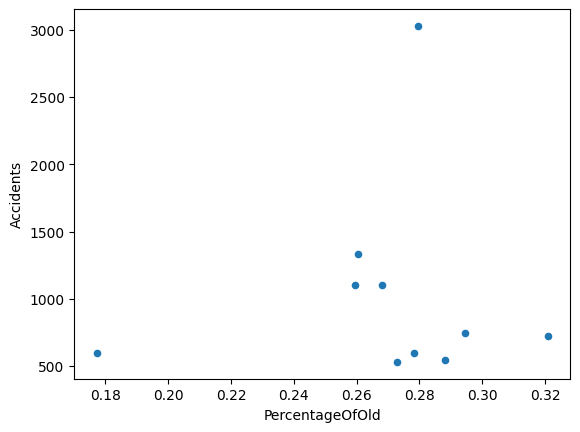

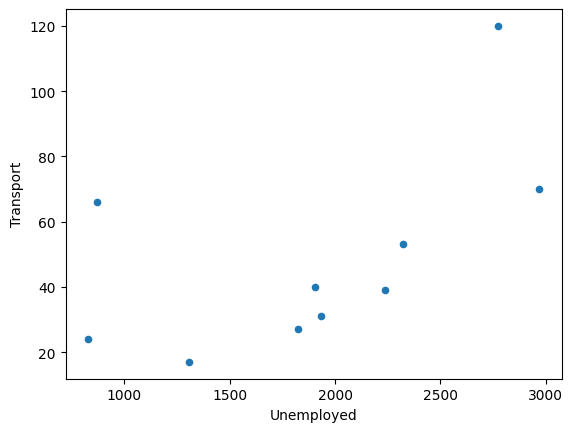

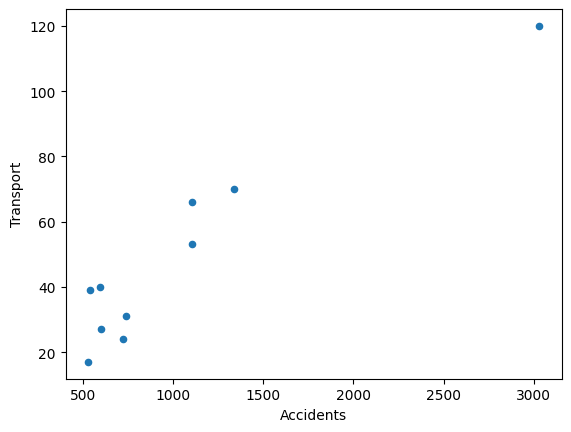

In [ ]:
mergedf.plot.scatter(4,1);
mergedf.plot.scatter(0,2);
mergedf.plot.scatter(1,2);

<Axes: xlabel='Transport', ylabel='Accidents'>

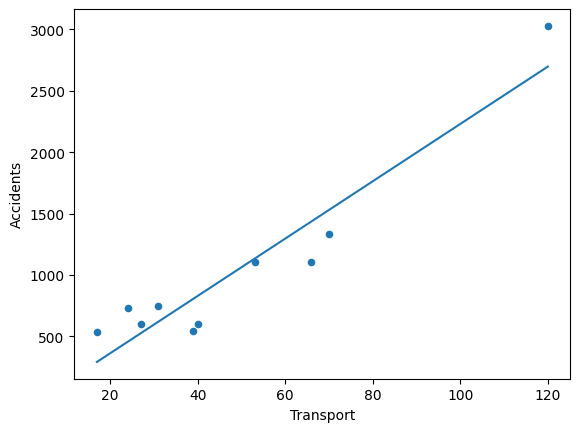

In [ ]:
#mergedf.plot.scatter(2,1);
import numpy as np
z = np.polyfit(x=mergedf['Transport'], y=mergedf['Accidents'], deg=1)
p = np.poly1d(z)
df=mergedf.copy()
df['trendline'] = p(mergedf['Transport'])
ax = df.plot.scatter(x='Transport', y='Accidents')
df.set_index('Transport', inplace=True)
df.trendline.sort_index(ascending=False).plot(ax=ax)
plt.gca()

<Axes: title={'center': 'no of public transport options per district'}, xlabel='District Name'>

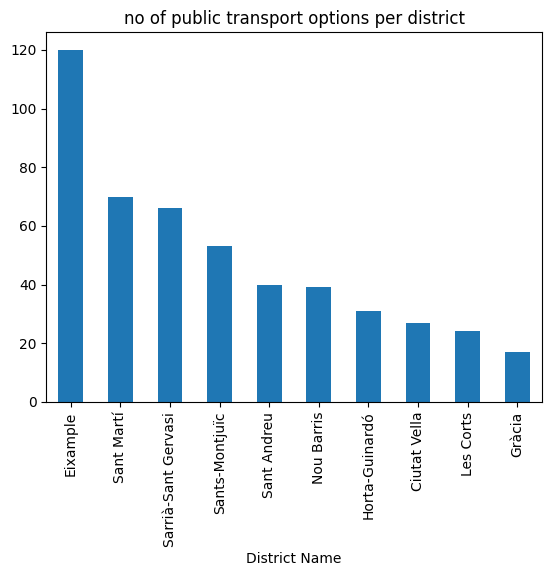

In [ ]:
tdf['District.Name'].value_counts().plot(kind='bar', title='no of public transport options per district', xlabel='District Name')

# BUS STOP

In [ ]:
bdf = pd.read_csv('/content/drive/MyDrive/UberHackathon/bus_stops.csv')
bdf.head()

,Code,Transport,Longitude,Latitude,Bus.Stop,District.Name,Neighborhood.Name
0,K014,Day bus stop,2.171619,41.413744,BUS -192--,Horta-Guinardó,el Guinardó
1,K014,Day bus stop,2.134902,41.420222,BUS -124--,Gràcia,Vallcarca i els Penitents
2,K014,Day bus stop,2.162913,41.423187,BUS -117--,Horta-Guinardó,la Font d'en Fargues
3,K014,Day bus stop,2.163667,41.422899,BUS -117--,Horta-Guinardó,la Font d'en Fargues
4,K014,Day bus stop,2.120212,41.397209,BUS -130--,Sarrià-Sant Gervasi,Sarrià


In [ ]:
mergedf['Bus'] = bdf['District.Name'].value_counts()
mergedf.head()

,Unemployed,Accidents,Transport,Population,PercentageOfOld,UERate,Bus
District Name,,,,,,,
Ciutat Vella,1825,600.0,27.0,101387.0,0.177291,0.018000,167
Eixample,2775,3029.0,120.0,266416.0,0.279649,0.010416,405
Gràcia,1308,531.0,17.0,121347.0,0.272945,0.010779,210
Horta-Guinardó,1933,743.0,31.0,168751.0,0.294487,0.011455,389
Les Corts,829,726.0,24.0,82033.0,0.320907,0.010106,207


<Axes: title={'center': 'no of bus stops per district'}, xlabel='District Name'>

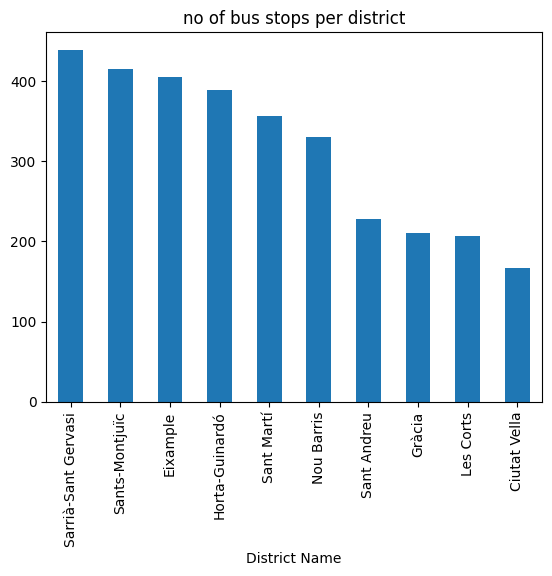

In [ ]:
bdf['District.Name'].value_counts().plot(kind='bar', title='no of bus stops per district', xlabel='District Name')

# LIFE EXPECTANCY

In [ ]:
dn=df[['Neighborhood.Name','District.Name']]
dn = dn.drop_duplicates()

In [ ]:
ledf = pd.read_csv('/content/drive/MyDrive/UberHackathon/life_expectancy.csv')
ledf.head()
ledf = (ledf.merge(dn, left_on='Neighborhood', right_on='Neighborhood.Name'))
ledf = ledf.drop('Neighborhood.Name',axis=1)
ledf.head()

,Neighborhood,2006-2010,2007-2011,2008-2012,2009-2013,2010-2014,Gender,District.Name
0,el Raval,87.5,84.9,84.7,84.9,85.3,Female,Ciutat Vella
1,el Raval,77.9,75.1,75.7,76.2,76.5,Male,Ciutat Vella
2,el Barri Gòtic,88.0,84.3,84.4,87.5,84.4,Female,Ciutat Vella
3,el Barri Gòtic,81.3,78.6,78.9,79.5,78.7,Male,Ciutat Vella
4,la Barceloneta,88.2,85.3,84.4,86.3,84.7,Female,Ciutat Vella


In [ ]:
mergedf['LifeExpectancy'] = ledf.groupby('District.Name')['2010-2014'].mean()
mergedf.head()

,Unemployed,Accidents,Transport,Population,PercentageOfOld,UERate,Bus,LifeExpectancy
District Name,,,,,,,,
Ciutat Vella,1825,600.0,27.0,101387.0,0.177291,0.018000,167,81.137500
Eixample,2775,3029.0,120.0,266416.0,0.279649,0.010416,405,83.883333
Gràcia,1308,531.0,17.0,121347.0,0.272945,0.010779,210,83.660000
Horta-Guinardó,1933,743.0,31.0,168751.0,0.294487,0.011455,389,83.370000
Les Corts,829,726.0,24.0,82033.0,0.320907,0.010106,207,85.833333


#DEATH??

In [ ]:
ddf = pd.read_csv('/content/drive/MyDrive/UberHackathon/deaths.csv')
ddf.head(50)

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0
5,2017,2,Eixample,6,la Sagrada Família,0-4,1
6,2017,2,Eixample,7,la Dreta de l'Eixample,0-4,0
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,0-4,0
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,0-4,0
9,2017,2,Eixample,10,Sant Antoni,0-4,0


In [ ]:
mergedf.head(50)

,Unemployed,Accidents,Transport,Population,PercentageOfOld,UERate,Bus,LifeExpectancy
District Name,,,,,,,,
Ciutat Vella,1825,600.0,27.0,101387.0,0.177291,0.018000,167,81.137500
Eixample,2775,3029.0,120.0,266416.0,0.279649,0.010416,405,83.883333
Gràcia,1308,531.0,17.0,121347.0,0.272945,0.010779,210,83.660000
Horta-Guinardó,1933,743.0,31.0,168751.0,0.294487,0.011455,389,83.370000
Les Corts,829,726.0,24.0,82033.0,0.320907,0.010106,207,85.833333
Nou Barris,2237,542.0,39.0,166579.0,0.288001,0.013429,330,82.246154
Sant Andreu,1906,597.0,40.0,147594.0,0.278229,0.012914,228,84.000000
Sant Martí,2968,1336.0,70.0,235513.0,0.260317,0.012602,356,84.211111
Sants-Montjuïc,2324,1104.0,53.0,181910.0,0.259584,0.012776,415,83.550000


# CORRELATION

In [ ]:
mergedf.corr()
#nothing special

,Unemployed,Accidents,Transport,Population,PercentageOfOld,UERate,Bus,LifeExpectancy
Unemployed,1.000000,0.506886,0.559240,0.828709,-0.191677,0.431771,0.349893,-0.299020
Accidents,0.506886,1.000000,0.946634,0.790933,0.074880,-0.272393,0.531050,0.200802
Transport,0.559240,0.946634,1.000000,0.860473,0.037612,-0.306780,0.656412,0.155821
Population,0.828709,0.790933,0.860473,1.000000,0.087989,-0.127117,0.704899,0.032664
PercentageOfOld,-0.191677,0.074880,0.037612,0.087989,1.000000,-0.632598,0.248711,0.747989
UERate,0.431771,-0.272393,-0.306780,-0.127117,-0.632598,1.000000,-0.517644,-0.703782
Bus,0.349893,0.531050,0.656412,0.704899,0.248711,-0.517644,1.000000,0.143999
LifeExpectancy,-0.299020,0.200802,0.155821,0.032664,0.747989,-0.703782,0.143999,1.000000


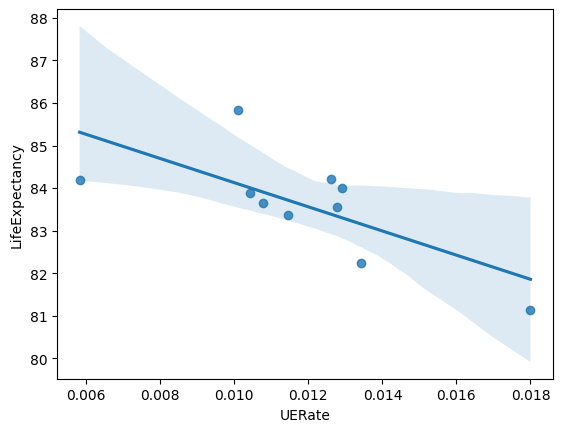

In [ ]:
import seaborn as sns

# plot 1 with axes level-plot
ax = sns.regplot(data=mergedf, x="UERate", y="LifeExpectancy")

<Axes: xlabel='UERate', ylabel='LifeExpectancy'>

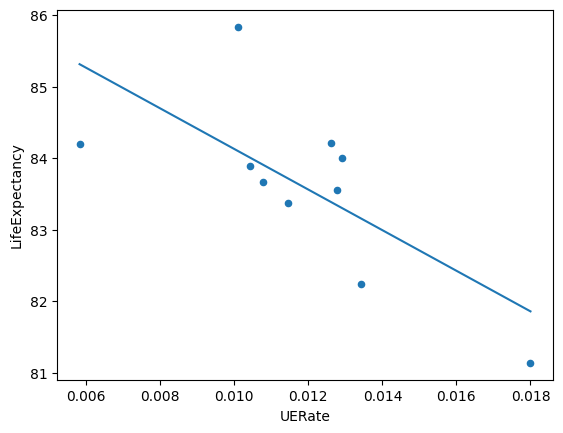

In [ ]:
import numpy as np
z = np.polyfit(x=mergedf['UERate'], y=mergedf['LifeExpectancy'], deg=1)
p = np.poly1d(z)
df=mergedf.copy()
df['trendline'] = p(mergedf['UERate'])
ax = df.plot.scatter(x='UERate', y='LifeExpectancy')
df.set_index('UERate', inplace=True)
df.trendline.sort_index(ascending=False).plot(ax=ax)
plt.gca()

# CORRELATION / p VALUE

In [ ]:
from scipy.stats import pearsonr


#calculation correlation coefficient and p-value between x and y
pearsonr(mergedf['Transport'], mergedf['Accidents'])

PearsonRResult(statistic=0.9466339164061552, pvalue=3.326229437236379e-05)

In [ ]:
pearsonr(mergedf['UERate'], mergedf['LifeExpectancy'])

PearsonRResult(statistic=-0.703781757710021, pvalue=0.02312597624178934)

# MACHINE LEARNING

In [ ]:
adf.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.126,41.340
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120,41.339
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167,41.361
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.125,41.338
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185,41.416


In [ ]:
import pandas as pd

def GetMonthInInt(month):
    MonthInInts = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12],index=['January','February','March','April','May','June','July','August','September','October','November','December'])
    return MonthInInts[month]

adf['MonthInInt']= adf['Month'].apply(GetMonthInInt)
adf.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,MonthInInt
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.126,41.340,10
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120,41.339,9
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167,41.361,12
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.125,41.338,7
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185,41.416,5


In [ ]:
adf = adf.sort_values(by=['MonthInInt','Day'])
adf.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,MonthInInt
322,2017S000008,Eixample,la Dreta de l'Eixample,ARAGÓ / Pau Claris ...,Sunday,January,1,10,Morning,2,0,2,2,2.166,41.393,1
359,2017S000013,Eixample,la Dreta de l'Eixample,ARAGÓ / Pg Gràcia ...,Sunday,January,1,15,Afternoon,1,0,1,1,2.165,41.392,1
600,2017S000012,Eixample,el Fort Pienc,GV CORTS CATALANES / Castillejos ...,Sunday,January,1,10,Morning,2,0,2,2,2.185,41.402,1
872,2017S000001,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,VIA AUGUSTA ...,Sunday,January,1,4,Night,1,0,1,1,2.151,41.401,1
878,2017S000022,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,AV DIAGONAL ...,Sunday,January,1,22,Night,1,0,1,2,2.150,41.394,1


In [ ]:
from datetime import date, timedelta
start = date(2016,12,31)

day = 0
today = 0
daysincestart = 0
df1 = pd.DataFrame(columns=['accidents per day','datetime'])
for index, row in adf.iterrows():
    if row['Day']==day:
      today += 1
    else:
      df1.loc[len(df1.index)] = [today, (start + timedelta(daysincestart))]
      day = row['Day']
      today = 1
      daysincestart += 1
df1.head(367)



,accidents per day,datetime
0,0,2016-12-31
1,22,2017-01-01
2,18,2017-01-02
3,29,2017-01-03
4,28,2017-01-04
...,...,...
360,24,2017-12-26
361,38,2017-12-27
362,25,2017-12-28
363,17,2017-12-29


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

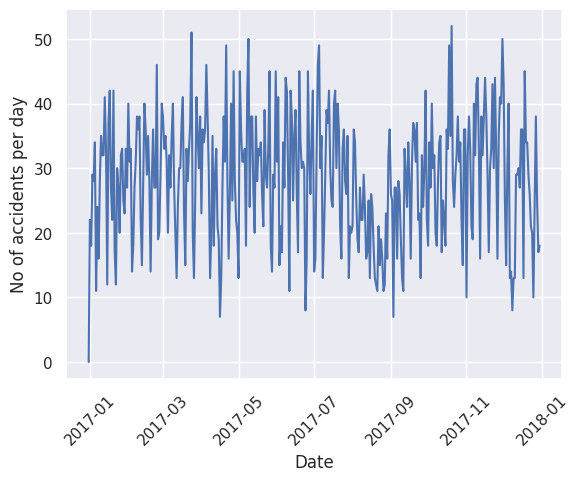

In [ ]:
plt.ylabel('No of accidents per day')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df1['datetime'], df1['accidents per day'])

<ipython-input-57-614f4a5347de>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train = df1[df1['datetime'] < pd.to_datetime("2017-11-01", format='%Y-%m-%d')]
<ipython-input-57-614f4a5347de>:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test = df1[df1['datetime'] > pd.to_datetime("2017-11-01", format='%Y-%m-%d')]


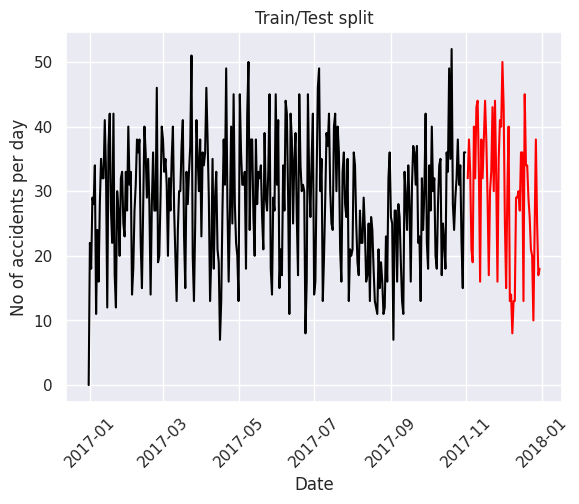

In [ ]:
train = df1[df1['datetime'] < pd.to_datetime("2017-11-01", format='%Y-%m-%d')]
test = df1[df1['datetime'] > pd.to_datetime("2017-11-01", format='%Y-%m-%d')]

plt.plot(train['datetime'], train['accidents per day'], color = "black")
plt.plot(test['datetime'], test['accidents per day'], color = "red")
plt.ylabel('No of accidents per day')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


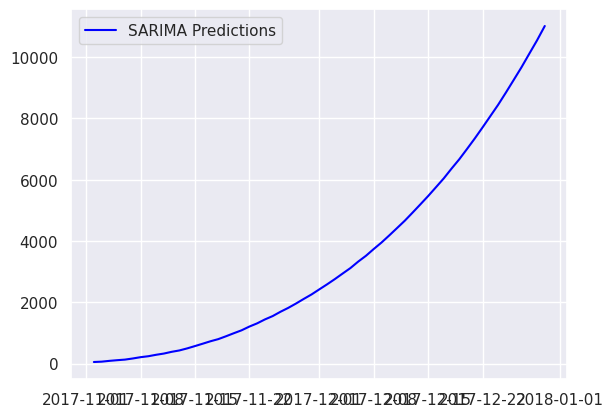

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['accidents per day']

# ARMAmodel = SARIMAX(y, order = (1, 0, 1))
# ARMAmodel = ARMAmodel.fit()

# y_pred = ARMAmodel.get_forecast(len(test['datetime']))
# y_pred_df = y_pred.conf_int(alpha = 0.05)
# y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test['datetime']
# y_pred_out = y_pred_df["Predictions"]

# plt.plot(y_pred_out, color='green', label = 'Predictions')
# plt.legend()

# import numpy as np
# from sklearn.metrics import mean_squared_error

# arma_rmse = np.sqrt(mean_squared_error(test["accidents per day"].values, y_pred_df["Predictions"]))
# print("RMSE: ",arma_rmse)

# ARIMAmodel = ARIMA(y, order = (5,4,2))
# ARIMAmodel = ARIMAmodel.fit()

# y_pred = ARIMAmodel.get_forecast(len(test["datetime"]))
# y_pred_df = y_pred.conf_int(alpha = 0.05)
# y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
# y_pred_df.index = test["datetime"]
# y_pred_out = y_pred_df["Predictions"]
# plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
# plt.legend()


# import numpy as np
# from sklearn.metrics import mean_squared_error

# arma_rmse = np.sqrt(mean_squared_error(test["accidents per day"].values, y_pred_df["Predictions"]))
# print("RMSE: ",arma_rmse)


SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test['datetime']))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test['datetime']
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [ ]:

# grid search sarima hyperparameters for daily female dataset
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# one-step sarima forecast
def sarima_forecast(history, config):
 order, sorder, trend = config
 # define model
 model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
 # fit model
 model_fit = model.fit(disp=False)
 # make one step forecast
 yhat = model_fit.predict(len(history), len(history))
 print("sarima")
 return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
 return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(train, test, cfg):
 predictions = list()
 # split dataset
 #train, test = train_test_split(data, n_test)
 # seed history with training dataset
 history = [x for x in train]
 # step over each time-step in the test set
 for i in range(len(test)):
 # fit model and make forecast for history
  yhat = sarima_forecast(history, cfg)
  # store forecast in list of predictions
  predictions.append(yhat)
  # add actual observation to history for the next loop
  history.append(test[i])
 # estimate prediction error
 error = measure_rmse(test, predictions)
 print(error)
 return error

# score a model, return None on failure
def score_model(train,test, cfg, debug=False):
  print("hihi")
  result = None
  # convert config to a key
  key = str(cfg)
  result = walk_forward_validation(train,test, cfg)
  # show all warnings and fail on exception if debugging
  # if debug:
  #   result = walk_forward_validation(train,test, cfg)
  # else:
  # # one failure during model validation suggests an unstable config
  #   try:
  #   # never show warnings when grid searching, too noisy
  #     with catch_warnings():
  #       filterwarnings("ignore")
  #       result = walk_forward_validation(train,test, cfg)
  #   except:
  #     error = None
  # check for an interesting result
  if result is not None:
    print(' > Model[%s] %.3f' % (key, result))
  return (key, result)

# grid search configs
def grid_search(train,test, cfg_list, parallel=False):
 scores = None
 if parallel:
 # execute configs in parallel
  executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
  tasks = (delayed(score_model)(train,test, cfg) for cfg in cfg_list)
  scores = executor(tasks)
 else:
  print("hi")
  scores = [score_model(train,test, cfg) for cfg in cfg_list]
  # remove empty results
  scores = [r for r in scores if r[1] != None]
  # sort configs by error, asc
  scores.sort(key=lambda tup: tup[1])
 return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
 models = list()
 # define config lists
 p_params = [0, 1, 2]
 d_params = [0, 1]
 q_params = [0, 1, 2]
 t_params = ['n','c','t','ct']
 P_params = [0, 1, 2]
 D_params = [0, 1]
 Q_params = [0, 1, 2]
 m_params = seasonal
 # create config instances
 for p in p_params:
  for d in d_params:
    for q in q_params:
      for t in t_params:
        for P in P_params:
          for D in D_params:
            for Q in Q_params:
              for m in m_params:
                cfg = [(p,d,q), (P,D,Q,m), t]
                models.append(cfg)
 return models

cfg_list = sarima_configs()
print(cfg_list)
scores = grid_search(train, test, cfg_list)
print(scores)
 # list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)


[[(0, 0, 0), (0, 0, 0, 0), 'n'], [(0, 0, 0), (0, 0, 1, 0), 'n'], [(0, 0, 0), (0, 0, 2, 0), 'n'], [(0, 0, 0), (0, 1, 0, 0), 'n'], [(0, 0, 0), (0, 1, 1, 0), 'n'], [(0, 0, 0), (0, 1, 2, 0), 'n'], [(0, 0, 0), (1, 0, 0, 0), 'n'], [(0, 0, 0), (1, 0, 1, 0), 'n'], [(0, 0, 0), (1, 0, 2, 0), 'n'], [(0, 0, 0), (1, 1, 0, 0), 'n'], [(0, 0, 0), (1, 1, 1, 0), 'n'], [(0, 0, 0), (1, 1, 2, 0), 'n'], [(0, 0, 0), (2, 0, 0, 0), 'n'], [(0, 0, 0), (2, 0, 1, 0), 'n'], [(0, 0, 0), (2, 0, 2, 0), 'n'], [(0, 0, 0), (2, 1, 0, 0), 'n'], [(0, 0, 0), (2, 1, 1, 0), 'n'], [(0, 0, 0), (2, 1, 2, 0), 'n'], [(0, 0, 0), (0, 0, 0, 0), 'c'], [(0, 0, 0), (0, 0, 1, 0), 'c'], [(0, 0, 0), (0, 0, 2, 0), 'c'], [(0, 0, 0), (0, 1, 0, 0), 'c'], [(0, 0, 0), (0, 1, 1, 0), 'c'], [(0, 0, 0), (0, 1, 2, 0), 'c'], [(0, 0, 0), (1, 0, 0, 0), 'c'], [(0, 0, 0), (1, 0, 1, 0), 'c'], [(0, 0, 0), (1, 0, 2, 0), 'c'], [(0, 0, 0), (1, 1, 0, 0), 'c'], [(0, 0, 0), (1, 1, 1, 0), 'c'], [(0, 0, 0), (1, 1, 2, 0), 'c'], [(0, 0, 0), (2, 0, 0, 0), 'c'], [(0, 0,

TypeError: ignored

In [ ]:
data = df1.copy()
acc = df1['accidents per day']
print(acc)
data = data.reindex(df1['datetime'])
data['accidents'] = 0

count = 0
for ind in data.index:
    data['accidents'][ind] = acc[count]
    count=count+1

data=data[['accidents']]
data.head()


In [ ]:
!pip install arm-mango

In [ ]:
data_values = list(data['accidents'])
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from mango import scheduler, Tuner

param_space = dict(p= range(0, 30),
                   d= range(0, 30),
                   q =range(0, 30),
                   trend = ['n', 'c', 't', 'ct']
                  )

def arima_objective_function(args_list):
    global data_values
    params_evaluated = []
    results = []

    for params in args_list:
        try:
            p,d,q = params['p'],params['d'], params['q']
            trend = params['trend']

            model = ARIMA(data_values, order=(p,d,q), trend = trend)
            predictions = model.fit()

            mse = mean_squared_error(data_values, predictions.fittedvalues)
            params_evaluated.append(params)
            results.append(mse)
        except:
            #print(f"Exception raised for {params}")
            #pass
            params_evaluated.append(params)
            results.append(1e5)

        #print(params_evaluated, mse)
    return params_evaluated, results

from mango import scheduler, Tuner

conf_Dict = dict()
conf_Dict['num_iteration'] = 200

tuner = Tuner(param_space, arima_objective_function, conf_Dict)
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

def plot_arima(data_values, order = (1,1,1), trend = 'c'):
    print('final model:', order, trend)
    model = ARIMA(data_values, order=order, trend = trend)
    results = model.fit()

    error = mean_squared_error(data_values, results.fittedvalues)
    print('MSE error is:', error)

from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.plot(data, label = "original Series", linewidth = 4)
plt.plot(results.fittedvalues, color='red', label = "Predictions", linestyle='dashed', linewidth = 3)
plt.legend(fontsize = 25)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

print(results['best_params'])

order = (results['best_params']['p'], results['best_params']['d'], results['best_params']['q'])
plot_arima(data_values, order=order, trend = results['best_params']['trend'])